In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

#df=pd.read_csv("Feature_Matrix_All.csv")
df=pd.read_csv("Sub1(Fz,F3,F4) Channels Data.csv")
#df=pd.read_csv("Sub2(Fz,F3,F4) Channels Data.csv")
#df=pd.read_csv("Sub3(Fz,F3,F4) Channels Data.csv")
df=df.drop(['Mode','Max','Min'],axis=1)

In [2]:
df

,Mean,Median,STD,Skewness,Kurtosis,Mean Abs Val,Class
0,0.072587,0.119585,12.218783,0.464968,7.807502,8.682422,1
1,-0.240493,0.094352,11.686677,0.348392,6.374927,8.494145,1
2,0.238910,-0.121875,10.736769,0.327105,4.756149,8.148421,1
3,0.021933,0.272134,10.119976,0.164435,5.474152,7.544624,1
4,-0.273104,-0.234525,12.999524,-0.267836,7.365423,9.137891,1
...,...,...,...,...,...,...,...
355,0.040805,0.261757,10.747088,-0.052336,3.405335,8.392199,0
356,0.053641,0.081551,9.934340,-0.019582,2.822419,7.974958,0
357,0.029262,-0.211659,9.738427,0.037117,2.862936,7.775243,0
358,-0.084238,-0.045235,10.213694,-0.053306,2.875820,8.156537,0


In [3]:
dataf=((df-df.min())/(df.max()-df.min()))
dataf=df

In [4]:
X=dataf.drop(['Class'], axis = 1)
y=dataf.Class
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [5]:
X

,Mean,Median,STD,Skewness,Kurtosis,Mean Abs Val
0,0.072587,0.119585,12.218783,0.464968,7.807502,8.682422
1,-0.240493,0.094352,11.686677,0.348392,6.374927,8.494145
2,0.238910,-0.121875,10.736769,0.327105,4.756149,8.148421
3,0.021933,0.272134,10.119976,0.164435,5.474152,7.544624
4,-0.273104,-0.234525,12.999524,-0.267836,7.365423,9.137891
...,...,...,...,...,...,...
355,0.040805,0.261757,10.747088,-0.052336,3.405335,8.392199
356,0.053641,0.081551,9.934340,-0.019582,2.822419,7.974958
357,0.029262,-0.211659,9.738427,0.037117,2.862936,7.775243
358,-0.084238,-0.045235,10.213694,-0.053306,2.875820,8.156537


>LogisticRegression: ideal=0.683, cv=0.681
>RidgeClassifier: ideal=0.642, cv=0.636
>SGDClassifier: ideal=0.628, cv=0.592
>PassiveAggressiveClassifier: ideal=0.592, cv=0.636
>KNeighborsClassifier: ideal=0.817, cv=0.828
>DecisionTreeClassifier: ideal=0.889, cv=0.861
>ExtraTreeClassifier: ideal=0.883, cv=0.828
>LinearSVC: ideal=0.686, cv=0.639
>SVC: ideal=0.642, cv=0.642
>GaussianNB: ideal=0.664, cv=0.667
>AdaBoostClassifier: ideal=0.850, cv=0.831
>BaggingClassifier: ideal=0.894, cv=0.881
>RandomForestClassifier: ideal=0.928, cv=0.894
>ExtraTreesClassifier: ideal=0.953, cv=0.928
>GradientBoostingClassifier: ideal=0.894, cv=0.875
>LinearDiscriminantAnalysis: ideal=0.647, cv=0.636
>QuadraticDiscriminantAnalysis: ideal=0.681, cv=0.683
Correlation: 0.984


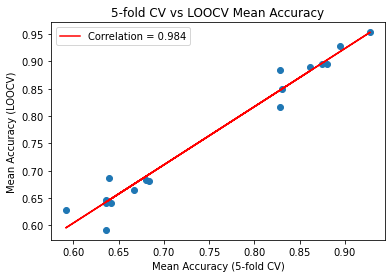

In [12]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(SGDClassifier())
    models.append(PassiveAggressiveClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreeClassifier())
    models.append(LinearSVC())
    models.append(SVC())
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreesClassifier())
    #models.append(GaussianProcessClassifier())
    models.append(GradientBoostingClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(QuadraticDiscriminantAnalysis())
    return models

# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)

# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue 
    # store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
    # summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r',label='Correlation = %0.3f' %corr)
# label the plot
pyplot.title('5-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (5-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
pyplot.legend()
fig3 = pyplot.gcf()
# show the plot
pyplot.show()
fig3.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Correlation.png', dpi=500)

In [8]:
fig3 = pyplot.gcf()

<Figure size 432x288 with 0 Axes>

In [9]:
pyplot.show()

In [10]:
fig3.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Correlation.png', dpi=500)